# Titanic Dataset Exploratory Data Analysis (EDA)

This notebook explores the Titanic dataset to analyze survival patterns based on various factors such as age, gender, passenger class, and more. We aim to understand the characteristics of passengers who survived compared to those who did not.

Two approaches are used to handle missing values in the 'Age' column:

1. Dropping rows with missing age values.
2. Predicting missing age values using a RandomForest model.

At the end, we'll compare the insights from both approaches.

#### Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Titanic.csv")
data

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


## Handling Missing Values

The dataset contains missing values, especially in the 'Age' column. We'll handle missing values in two different ways:

In [3]:
data.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

We see here that the 'age' column has a lot of missing values. I will tackle this using two approches - 
1. I will drop all the rows where age is missing and perform analysis
2. I will create a simple model to predict what the age could have been with the help of the other columns.

At the end, I will compare both the analyses.

For 'embarked', I am simply filling it with the mode since only 2 rows are missing this value.


In [ ]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

## Approach 1: Drop all missing age rows

In [4]:
data_age_dropped = data.copy()
data_age_dropped = data_age_dropped.dropna()


### Exploratory Data Analysis (EDA) - Dropped Age Values

In this section, we analyze the dataset after removing rows with missing 'Age' values. This analysis serves as a baseline to understand survival patterns based solely on available data.

### Survival by Gender

Analyzing survival rates by gender can provide insights into whether gender played a significant role in survival rates during the Titanic disaster.

Text(0.5, 1.0, 'Survival Count by Gender (Rows with Missing Age Dropped)')

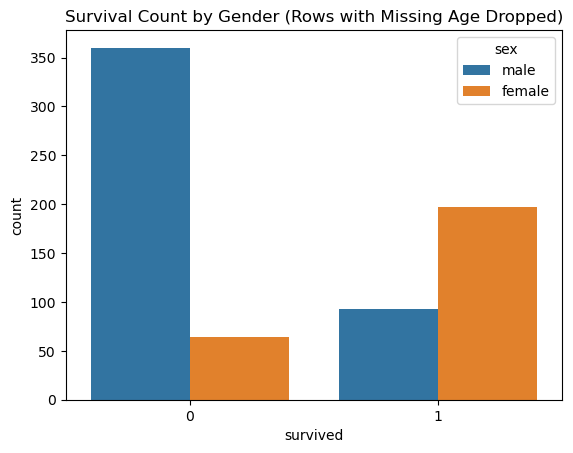

In [5]:
sns.countplot(data=data_age_dropped, x='survived', hue='sex')
plt.title('Survival Count by Gender (Rows with Missing Age Dropped)')

### Survival by Passenger Class

Passenger class may have impacted survival rates, as higher-class passengers often had better access to lifeboats. This section explores survival by class.

Text(0.5, 1.0, 'Survival Count by Passenger Class (Rows with Missing Age Dropped)')

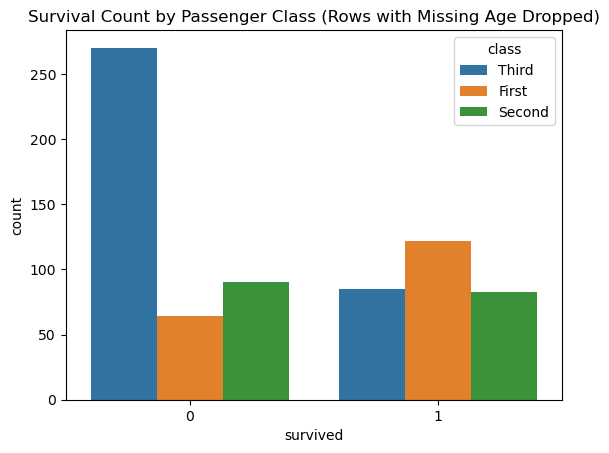

In [6]:
sns.countplot(data=data_age_dropped, x='survived', hue='class')
plt.title('Survival Count by Passenger Class (Rows with Missing Age Dropped)')

### Age Distribution by Survival

This section investigates the age distribution of survivors and non-survivors to determine if age affected survival rates.

c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution by Survival (Rows with Missing Age Dropped)')

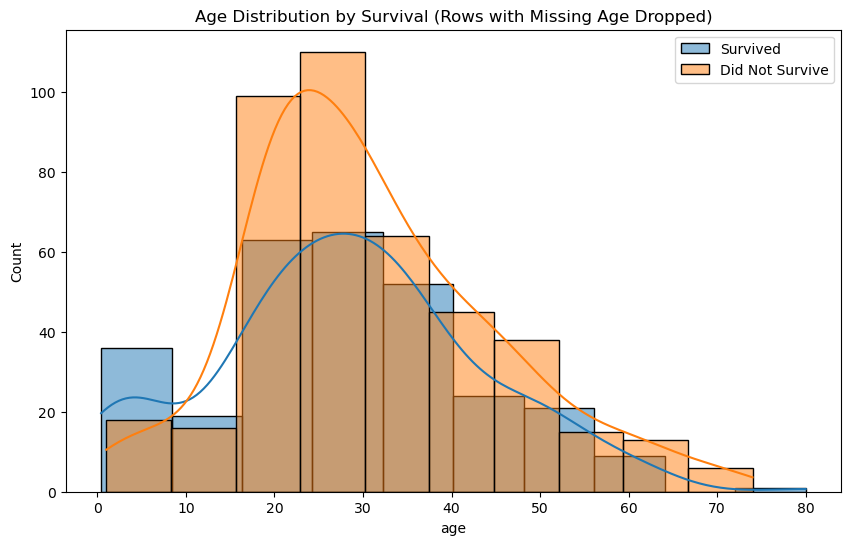

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data_age_dropped[data_age_dropped['survived'] == 1]['age'], bins=10, label='Survived', kde=True)
sns.histplot(data_age_dropped[data_age_dropped['survived'] == 0]['age'], bins=10, label='Did Not Survive', kde=True)
plt.legend()
plt.title('Age Distribution by Survival (Rows with Missing Age Dropped)')

## Approach 2: Predict missing age with a model

In [8]:
data_age_predicted = data.copy()

### Exploratory Data Analysis (EDA) - Predicted Age Values

In this section, we analyze the dataset with predicted 'Age' values. We use a RandomForest model to estimate missing ages, preserving all rows for a more comprehensive analysis.

In [9]:
from sklearn.ensemble import RandomForestRegressor

data_age_predicted['class'] = data_age_predicted['class'].map({'First': 1, 'Second': 2, 'Third': 3})
data_age_predicted = pd.get_dummies(data_age_predicted, columns=['sex'], drop_first=True)

# Defining features for prediction
features = ['class', 'sibsp', 'parch', 'fare', 'sex_male']

# Split data into rows with known and unknown 'Age'
known_age = data_age_predicted[data_age_predicted['age'].notnull()]
unknown_age = data_age_predicted[data_age_predicted['age'].isnull()]

# Model training on known 'Age' data
X_train = known_age[features]
y_train = known_age['age']
age_model = RandomForestRegressor(random_state=0)
age_model.fit(X_train, y_train)

# Predict missing ages
X_unknown = unknown_age[features]
predicted_ages = age_model.predict(X_unknown)

# Fill in the missing ages
data_age_predicted.loc[data_age_predicted['age'].isnull(), 'age'] = predicted_ages

In [10]:
data_age_predicted.isnull().sum()

age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
sex_male    0
dtype: int64

We have filled all the missing age with our model's predicted values

Let's convert the 'sex' column back to how it was originally (we one-hot encoded it during model training)

In [11]:
data_age_predicted.rename(columns={'sex_male': 'sex'}, inplace=True)
data_age_predicted['sex'] = data_age_predicted['sex'].map({True: 'male', False: 'female'})
data_age_predicted

,age,sibsp,parch,fare,embarked,class,who,alone,survived,sex
0,22.000000,1,0,7.2500,S,3,man,False,0,male
1,38.000000,1,0,71.2833,C,1,woman,False,1,female
2,26.000000,0,0,7.9250,S,3,woman,True,1,female
3,35.000000,1,0,53.1000,S,1,woman,False,1,female
4,35.000000,0,0,8.0500,S,3,man,True,0,male
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,S,2,man,True,0,male
887,19.000000,0,0,30.0000,S,1,woman,True,1,female
888,17.969762,1,2,23.4500,S,3,woman,False,0,female
889,26.000000,0,0,30.0000,C,1,man,True,1,male


Text(0.5, 1.0, 'Survival Count by Gender (Rows with Missing Age Dropped)')

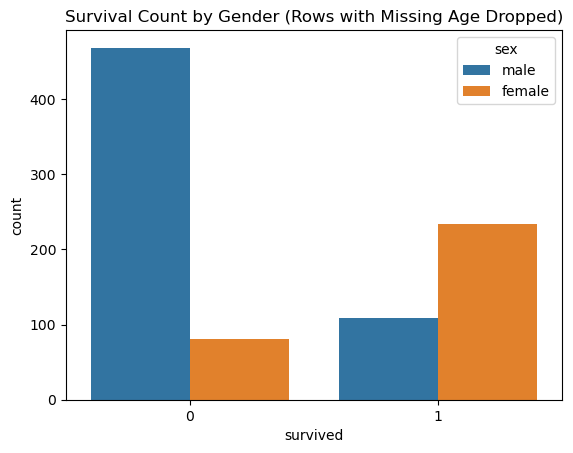

In [12]:
sns.countplot(data=data_age_predicted, x='survived', hue='sex')
plt.title('Survival Count by Gender (Rows with Missing Age Dropped)')

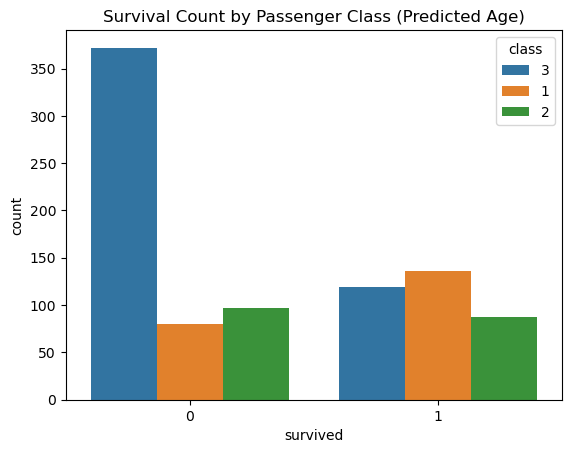

In [14]:
sns.countplot(x=data_age_predicted['survived'].astype(str), hue=data_age_predicted['class'].astype(str))
plt.title('Survival Count by Passenger Class (Predicted Age)')
plt.show()

c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


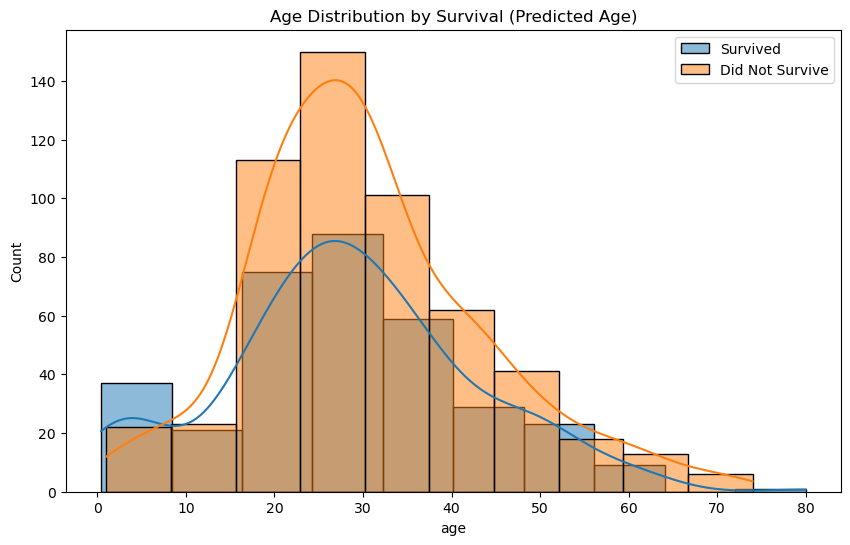

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data_age_predicted[data_age_predicted['survived'] == 1]['age'], bins=10, label='Survived', kde=True)
sns.histplot(data_age_predicted[data_age_predicted['survived'] == 0]['age'], bins=10, label='Did Not Survive', kde=True)
plt.legend()
plt.title('Age Distribution by Survival (Predicted Age)')
plt.show()


# Results:

### Survival by Gender (Dropped Age)

- **Females** have a significantly higher survival rate compared to males.
- The survival rate for females is around 74%, while for males, it is around 18%.
- This suggests that the "women and children first" protocol was followed.

### Survival by Passenger Class (Dropped Age)

- **First-class** passengers have the highest survival rate, followed by second-class, and then third-class.
- The survival rate for first-class is approximately 63%, while it is 47% for second-class and 24% for third-class.
- This indicates a higher likelihood of survival for passengers in higher socio-economic classes.


### Age Distribution by Survival (Dropped Age)

- Among survivors, a larger proportion are younger individuals, with many children and younger adults surviving.
- Non-survivors are distributed more evenly across ages, but fewer young children are in the non-surviving group.
- This aligns with the "women and children first" evacuation strategy.


### Survival by Gender (Predicted Age)

- The gender-based survival rates remain similar to those in the dataset where Age rows were dropped.
- Females still show a higher survival rate than males, indicating that the imputation of Age did not significantly impact the gender-based survival pattern.

### Survival by Passenger Class (Predicted Age)

- The survival rates by class are consistent with the dropped-age dataset, with first-class having the highest survival rate.
- Imputing Age values has minimal effect on the class-based survival trend.

### Age Distribution by Survival (Predicted Age)

- The age distribution is smoother due to the imputed values, but it shows similar trends as before.
- Young children and younger adults have higher survival rates, while non-survivors have a more even age distribution.
- The imputation of Age did not significantly change the age-based survival trends.

## Comparison of Results

After comparing both approaches, we observe the following:
- **Survival Patterns by Gender and Class**: Both datasets (dropped-age and predicted-age) show similar survival patterns by gender and class, indicating that the method of handling missing `Age` values did not affect these patterns.
- **Age Distribution**: The dataset with predicted `Age` values has a smoother age distribution, while the dropped-age dataset has some age groups underrepresented. However, the survival trends based on age remain similar in both approaches.
- **Conclusion**: Using a predictive model to fill in missing `Age` values allows for a more complete dataset without significantly altering key survival insights. The choice of approach depends on the context of the analysis; however, the prediction-based approach is often preferred as it maintains more data.
